In [2]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import manifold, model_selection, ensemble
%matplotlib inline
py.init_notebook_mode(connected=True)
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

/Users/tomasz/anaconda/envs/python36/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning:

The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.

/Users/tomasz/anaconda/envs/python36/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



In [4]:
data = pd.read_csv("../data/LionsDen.csv",sep=";")

print("Are there NaN values? ", data.isna().any().any())




data.head()

Are there NaN values?  True


,Unnamed: 0,CUSTOMER_ID,APPLICATION_ID,DEFAULT_FLAG,APPLICATION_DATE,APPLICATION_HOUR,APPLICATION_WEEKDAY,APPLICATION_MONTH,APPLICATION_YEAR,PRODUCT_GROUP,...,DPD,DPD_FALL_IN_12M,BIK_NUM_REQ_TOTAL_LZ3,BIK_NUM_REQ_TOTAL_LZ4_12,BIK_GRP,BIK_ACC_NUM_TOTAL_CLOSE,BIK_ACC_NUM_TOTAL_OPEN,BIK_BAL_TOTAL_OPEN,BIK_OVERDUE_12M_TOTAL_MAX,BIK_OVERDUE_EVER_TOTAL_MAX
0,1,102528122,362318345049,0,2017-05-10,07-24,3,5,2017,CASH LOAN,...,0.0,4.0,2,3,CREDIT HISTORY (FULL DATA),5.0,9.0,19250.0,0.0,0.0
1,2,146634735,635743726807,0,2016-01-09,07-24,7,1,2016,CASH LOAN,...,NaN,8.0,2,2,CREDIT HISTORY (FULL DATA),1.0,2.0,10950.0,0.0,3244.0
2,3,996453767,694627725843,0,2016-07-07,07-24,5,7,2016,OVERDRAFT,...,NaN,1.0,1,0,CREDIT HISTORY (FULL DATA),3.0,1.0,4650.0,67.0,67.0
3,4,816020174,989259535442,0,2016-07-20,07-24,3,7,2016,CASH LOAN,...,0.0,10.0,1,18,CREDIT HISTORY (FULL DATA),7.0,5.0,33300.0,0.0,1.0
4,5,930630805,77906299419,0,2015-06-30,07-24,3,6,2015,CASH LOAN,...,0.0,0.0,3,9,CREDIT HISTORY (PART DATA),13.0,2.0,3100.0,0.0,0.0


In [8]:
print("Is id unique? ",data.CUSTOMER_ID.is_unique)
print("Is application unique? ",data.APPLICATION_ID.is_unique)

Is id unique?  False
Is application unique?  True


In [9]:
data.describe()

,Unnamed: 0,CUSTOMER_ID,APPLICATION_ID,DEFAULT_FLAG,APPLICATION_WEEKDAY,APPLICATION_MONTH,APPLICATION_YEAR,LOAN_PERIOD,CREDIT_AMOUNT,COOP_PERIOD,...,DUE_AMOUNT,DPD,DPD_FALL_IN_12M,BIK_NUM_REQ_TOTAL_LZ3,BIK_NUM_REQ_TOTAL_LZ4_12,BIK_ACC_NUM_TOTAL_CLOSE,BIK_ACC_NUM_TOTAL_OPEN,BIK_BAL_TOTAL_OPEN,BIK_OVERDUE_12M_TOTAL_MAX,BIK_OVERDUE_EVER_TOTAL_MAX
count,79155.000000,7.915500e+04,7.915500e+04,79155.000000,79155.000000,79155.000000,79155.000000,79155.000000,79155.000000,79155.000000,...,65876.000000,65876.000000,71972.000000,79155.000000,79155.000000,74222.000000,74222.000000,7.422200e+04,74222.000000,74222.000000
mean,39578.000000,5.011687e+08,4.994300e+11,0.042410,3.901270,6.807845,2015.938601,41.482774,4667.297075,98.584979,...,7.041563,1.007833,3.437851,2.511515,2.491542,6.885977,3.934777,2.508902e+04,138.406807,572.854356
std,22850.224616,2.879946e+08,2.890948e+11,0.201525,1.757579,3.328680,1.092482,35.390071,6685.304097,64.066750,...,72.581892,18.193063,3.445301,1.821091,2.715710,8.925993,3.395230,4.701492e+04,1492.918659,4628.737114
min,1.000000,8.245000e+03,3.686175e+06,0.000000,1.000000,1.000000,2014.000000,0.000000,200.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,19789.500000,2.530550e+08,2.490771e+11,0.000000,2.000000,4.000000,2015.000000,12.000000,900.000000,49.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,2.000000,3.050000e+03,0.000000,0.000000
50%,39578.000000,5.009870e+08,4.990683e+11,0.000000,4.000000,7.000000,2016.000000,30.000000,2100.000000,86.000000,...,0.000000,0.000000,2.000000,2.000000,2.000000,4.000000,3.000000,1.025000e+04,0.000000,13.000000
75%,59366.500000,7.519408e+08,7.504741e+11,0.000000,5.000000,10.000000,2017.000000,80.000000,4700.000000,135.000000,...,0.000000,0.000000,6.000000,3.000000,4.000000,9.000000,5.000000,2.630000e+04,44.750000,204.000000
max,79155.000000,9.999889e+08,9.999911e+11,1.000000,7.000000,12.000000,2017.000000,96.000000,57000.000000,548.000000,...,11370.000000,949.000000,12.000000,37.000000,52.000000,175.000000,44.000000,1.061300e+06,133067.000000,512783.000000


In [32]:
data.dtypes

Unnamed: 0                         int64
CUSTOMER_ID                        int64
APPLICATION_ID                     int64
DEFAULT_FLAG                       int64
APPLICATION_DATE                  object
APPLICATION_HOUR                  object
APPLICATION_WEEKDAY                int64
APPLICATION_MONTH                  int64
APPLICATION_YEAR                   int64
PRODUCT_GROUP                     object
LOAN_PERIOD                        int64
CREDIT_AMOUNT                      int64
CUSTOMER_TYPE                     object
COOP_PERIOD                        int64
CREDIT_COOP_PERIOD                 int64
AGE                                int64
AGE_BANDS                         object
EDUCATION                         object
MARITAL_STATUS                    object
SPOUSE_PROPERTY_STATUS            object
OWNERSHIP                         object
NUMBER_OF_FAMILY_MEMBERS           int64
MAIL_ADDR_SAME_AS_RESIDENTIAL     object
EMAIL_DOMAIN                      object
EMAIL_NAME_SURNA

In [10]:
numeric = data.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64', 'bool'])
numeric.head()

,Unnamed: 0,CUSTOMER_ID,APPLICATION_ID,DEFAULT_FLAG,APPLICATION_WEEKDAY,APPLICATION_MONTH,APPLICATION_YEAR,LOAN_PERIOD,CREDIT_AMOUNT,COOP_PERIOD,...,DUE_AMOUNT,DPD,DPD_FALL_IN_12M,BIK_NUM_REQ_TOTAL_LZ3,BIK_NUM_REQ_TOTAL_LZ4_12,BIK_ACC_NUM_TOTAL_CLOSE,BIK_ACC_NUM_TOTAL_OPEN,BIK_BAL_TOTAL_OPEN,BIK_OVERDUE_12M_TOTAL_MAX,BIK_OVERDUE_EVER_TOTAL_MAX
0,1,102528122,362318345049,0,3,5,2017,96,4200,44,...,0.0,0.0,4.0,2,3,5.0,9.0,19250.0,0.0,0.0
1,2,146634735,635743726807,0,7,1,2016,36,11100,52,...,NaN,NaN,8.0,2,2,1.0,2.0,10950.0,0.0,3244.0
2,3,996453767,694627725843,0,5,7,2016,0,800,147,...,NaN,NaN,1.0,1,0,3.0,1.0,4650.0,67.0,67.0
3,4,816020174,989259535442,0,3,7,2016,36,5900,73,...,0.0,0.0,10.0,1,18,7.0,5.0,33300.0,0.0,1.0
4,5,930630805,77906299419,0,3,6,2015,5,1400,82,...,0.0,0.0,0.0,3,9,13.0,2.0,3100.0,0.0,0.0


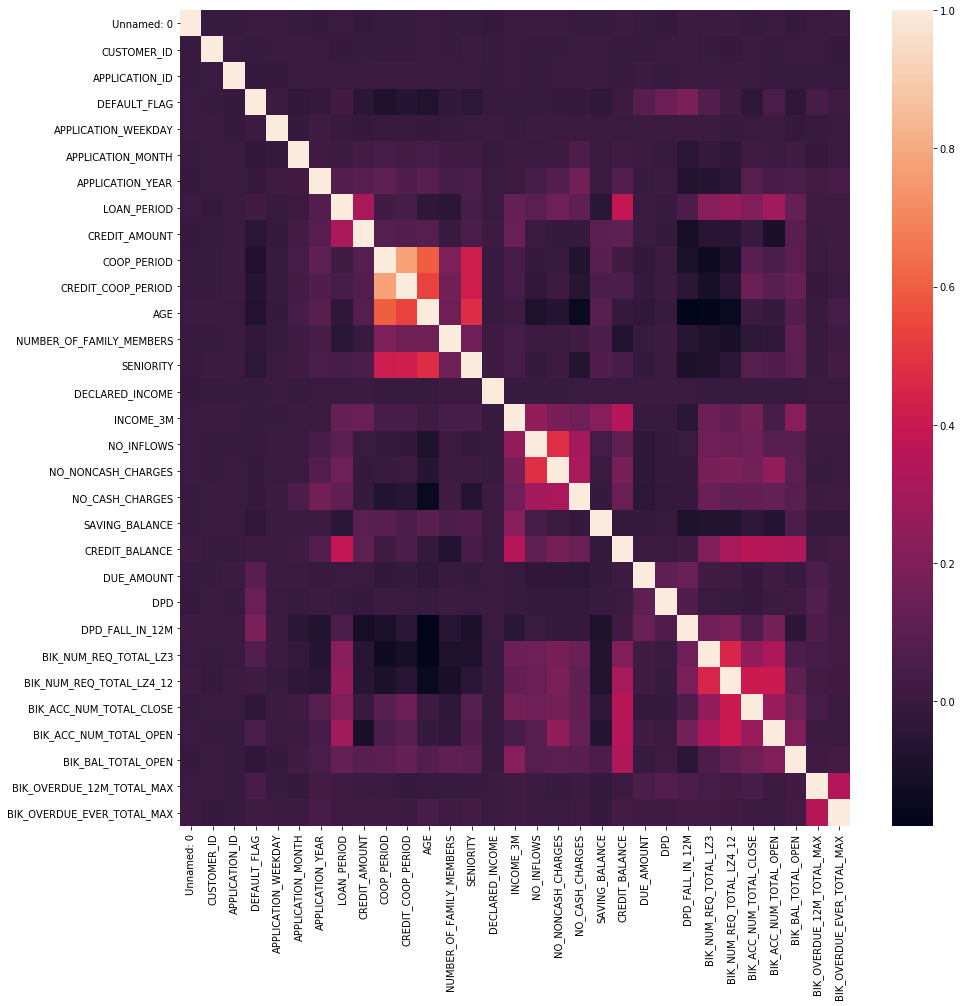

In [15]:
plt.figure(figsize=(15,15))
sns.heatmap(numeric.corr(), )
plt.show()

## Model based on all varaibles

In [23]:
X = numeric.drop('DEFAULT_FLAG', axis=1)
X = X.drop('Unnamed: 0', axis=1)
X = X.drop("CUSTOMER_ID",axis=1)
X = X.drop("APPLICATION_ID",axis=1)
X = X.fillna(X.mean())

y = numeric.DEFAULT_FLAG

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [25]:
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.149582
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:           DEFAULT_FLAG   No. Observations:                55408
Model:                          Logit   Df Residuals:                    55381
Method:                           MLE   Df Model:                           26
Date:                Wed, 16 May 2018   Pseudo R-squ.:                  0.1429
Time:                        17:22:49   Log-Likelihood:                -8288.0
converged:                       True   LL-Null:                       -9670.0
                                        LLR p-value:                     0.000
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
APPLICATION_WEEKDAY            0.0260      0.012      2.093      0.036     

In [39]:
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)
print(model.coef_)

[[  9.48242330e-06  -2.57751344e-05   1.39128098e-04   4.98561337e-04
   -3.86972519e-05  -1.66269308e-03  -1.09178630e-03  -2.72645358e-04
   -5.39711130e-06  -7.29455124e-04  -4.69184649e-06   9.67459784e-07
   -6.75967127e-06  -4.88133859e-05  -6.72308190e-05  -3.02192571e-05
    9.91832671e-06   1.77231799e-03   9.35186780e-04   2.44538398e-04
    5.31155248e-05   1.37582871e-05  -1.56262288e-04   5.88610522e-05
   -4.88222189e-06   4.40373613e-04   4.12751499e-06]]


In [40]:
y_preds = model.predict(X_test,)
print(classification_report(y_test, y_preds))

             precision    recall  f1-score   support

          0       0.98      0.57      0.72     22722
          1       0.07      0.73      0.13      1025

avg / total       0.94      0.57      0.69     23747



{'AGE_BANDS',
 'APPLICATION_DATE',
 'APPLICATION_HOUR',
 'BIK_GRP',
 'CREDIT_BALANCE_TO_LIMIT',
 'CUSTOMER_RUNNING_A_BUSINESS',
 'CUSTOMER_TYPE',
 'DECLARED_EXPEDITURES',
 'EDUCATION',
 'EMAIL_DOMAIN',
 'EMAIL_NAME_SURNAME',
 'EMP_TYPE',
 'MAIL_ADDR_SAME_AS_RESIDENTIAL',
 'MARITAL_STATUS',
 'MARKETING_CONSENT',
 'OWNERSHIP',
 'PRODUCT_GROUP',
 'REMUNERATION_PAID_BY_CASH',
 'REMUNERATION_PAID_TO_ING',
 'SPOUSE_PROPERTY_STATUS'}

## ANOVA

In [19]:
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols